In [1]:
//Implemented using C++17 in jupyterlab version 3.2.8 and C++ interpreter cling
//Operating System: Ubuntu 20.04.2 LTS 
//Hardware: Remote Virtual Machine
//Made in 2022
#include <iostream>
#include <cmath>
#include <unordered_map>
#include <vector>
#include <string>

In [2]:
typedef std::unordered_map<std::string, std::vector<std::string>> prefTable;

In [3]:
typedef std::vector<std::vector<std::string>> matching;

In [4]:
std::string createOmega(std::vector<std::string> strings)
{
    int n {1};
    for (std::string x : strings) if(n<x.length()) n = x.length();
    n++;
    std::string omega;
    for (int i = 1; i<=n; i++) omega += "a";
    return omega;
}

In [5]:
std::string findPartner(std::string name, matching match)
{
    int n = match[0].size();
    for (int i = 0; i < n; i++)
    {
        if(match[0][i] == name) return match[1][i];
        if(match[1][i] == name) return match[0][i];
    }
    throw std::invalid_argument("Name not found in matching");
}

In [6]:
std::vector<std::string> getPrefKeys(prefTable pref)
{
    std::vector<std::string> out{};
    for(auto &kv : pref) out.push_back(kv.first);
    return out;
}

In [7]:
matching getPrefValues(prefTable pref)
{
    matching out{};
    for(auto &kv : pref) out.push_back(kv.second);
    return out;
}

In [8]:
std::vector<std::string> removeFromList(std::vector<std::string> list, std::string item)
{
    std::vector<std::string> out {};
    for(std::string s : list) if(s!=item) out.push_back(s);
    return out;
}

In [9]:
matching stableMatching(prefTable pref1, prefTable pref2)
{
    int n = pref1.size();
    std::vector<std::string> men = getPrefKeys(pref1);
    std::vector<std::string> women = getPrefKeys(pref2);
    std::string omega {createOmega(men)};
    //initially match all women to omega
    matching match{{},{}};
    for(int i = 0; i < n; i++) match[0].push_back(omega);
    match[1] = getPrefKeys(pref2);
    
    //add omega to women's preferences
    for(auto& kv : pref2) kv.second.push_back(omega);
    
    int k = 0;
    std::string X;
    std::string x;
    std::vector<std::string> xList;
    std::string xPartner;
    
    while(k < n)
    {
        //X <- k+1th man
        X = men[k];
        
        while(X != omega)
        {
            //x <- X's best remaining preference
            x = pref1[X][0];
            
            //find if x prefers X to her current partner
            bool xPrefersX;
            xList = pref2[x];
            xPartner = findPartner(x, match);
            for(std::string man : xList)
            {
                if(man == xPartner)
                {
                    xPrefersX = false;
                    break;
                }
                else if(man == X)
                {
                    xPrefersX = true;
                    break;
                }
            }
            
            //if x prefers X, engage the two via the matching, and try to update the matching for x's previous partner
            if(xPrefersX)
            {
                for(int i = 0; i < n; i++)
                {
                    if (match[1][i] == x)
                    {
                        match[0][i] = X;
                        X = xPartner;
                        break;
                    }
                }
            }
            
            //if newly unpartnered men is not omega, remove his ex from his preference list, as she is incompatible
            if(X!=omega) pref1[X] = removeFromList(pref1[X],x);
        }
        k++;
    }
    return match;
}

In [10]:
std::string a {"a"};
std::string b {"b"};
std::string c {"c"};
std::string d {"d"};
std::string e {"e"};
std::string A {"A"};
std::string B {"B"};
std::string C {"C"};
std::string D {"D"};
std::string E {"E"};

In [11]:
prefTable menPref {
    {A,{a,b,c,d,e}},
    {B,{b,c,d,e,a}},
    {C,{c,d,e,a,b}},
    {D,{d,e,a,b,c}},
    {E,{e,a,b,c,d}}
};

prefTable womenPref {
    {a,{B,C,D,E,A}},
    {b,{C,D,E,A,B}},
    {c,{D,E,A,B,C}},
    {d,{E,A,B,C,D}},
    {e,{A,B,C,D,E}}
};
    

In [12]:
stableMatching(menPref,womenPref);

(matching) { { "E", "B", "D", "C", "A" }, { "e", "b", "d", "c", "a" } }


In [13]:
menPref = {
    {A,{c,b,d,a}},
    {B,{b,a,c,d}},
    {C,{b,d,a,c}},
    {D,{c,a,d,b}}
};

womenPref = {
    {a,{A,B,D,C}},
    {b,{C,A,D,B}},
    {c,{C,B,D,A}},
    {d,{B,A,C,D}}
};

(std::unordered_map &) { "b" => { "C", "A", "D", "B" }, "d" => { "B", "A", "C", "D" }, "c" => { "C", "B", "D", "A" }, "a" => { "A", "B", "D", "C" } }


In [14]:
stableMatching(menPref, womenPref);

(matching) { { "C", "A", "D", "B" }, { "b", "d", "c", "a" } }


In [15]:
std::string toString(std::vector<std::string> input)
{
    std::string out {"["};
    for(auto& str:input) out += str + ",";
    out.pop_back();
    return out + "]";
}

In [16]:
void printSummary(prefTable table1, prefTable table2)
{ 
    int n = table1.size();
    for(auto& kv : table1) std::cout << kv.first << " has ordered preferences " << toString(kv.second) << std::endl;
    std::cout << std::endl;
    for(auto& kv : table2) std::cout << kv.first << " has ordered preferences " << toString(kv.second) << std::endl;
    std::cout << std::endl;
    std::cout << "A stable matching is given by:" << std::endl;
    matching match = stableMatching(table1, table2);
    for(int i = 0; i < n; i++) std::cout << match[0][i] << match[1][i] << std::endl;
}

In [17]:
printSummary(menPref,womenPref)

D has ordered preferences [c,a,d,b]
C has ordered preferences [b,d,a,c]
B has ordered preferences [b,a,c,d]
A has ordered preferences [c,b,d,a]

b has ordered preferences [C,A,D,B]
d has ordered preferences [B,A,C,D]
c has ordered preferences [C,B,D,A]
a has ordered preferences [A,B,D,C]

A stable matching is given by:
Cb
Ad
Dc
Ba


(void) @0x7f8857600c70


In [18]:
//Unit test
bool isEqual(matching match1, matching match2)
{
    std::vector<std::string> list = match1[0];
    int n = match1[0].size();
    if(n != match2[0].size()) return false;
    for(int i = 0; i < n; i++)
    {
        try
        {
            if(match1[1][i]!=findPartner(match1[0][i], match2)) return false;
        }
        catch(...)
        {
            return false;
        }
    }
    return true;
}

In [19]:
matching testMatch { { "C", "A", "D", "B" }, { "b", "d", "c", "a" } };
if(isEqual(testMatch,stableMatching(menPref, womenPref)))
{
    std::cout << "Unit test passed" << std::endl;
}
else
{
    std::cout << "Unit test failed" << std::endl;
}

Unit test passed


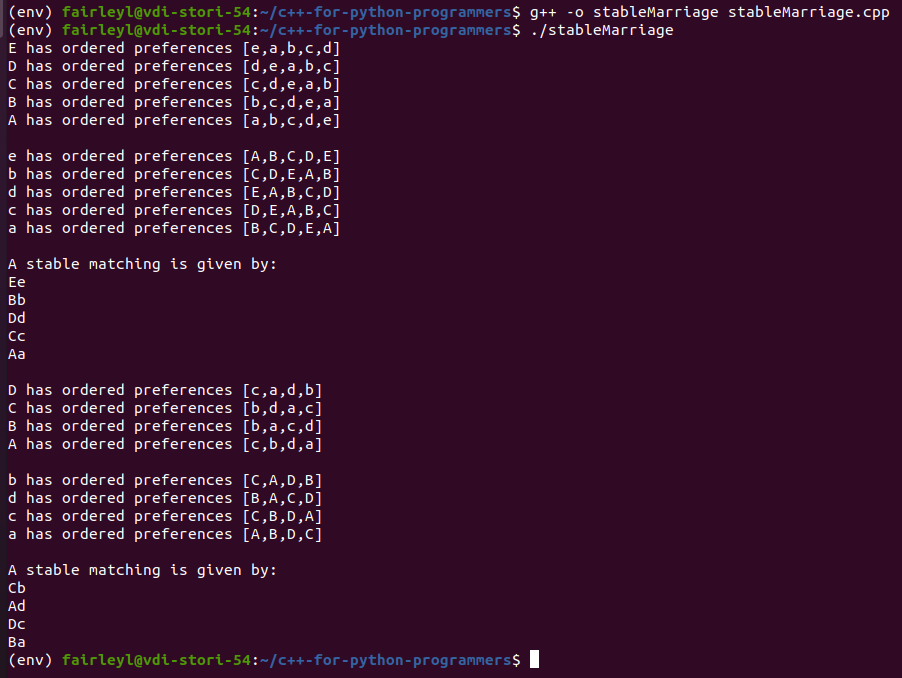